# Training with different topologies

Int this tutorial, you will learn how to use EncoderMap's new sparse trainign feature to learn the conformations of multiple proteins with different topologies.

Run this notebook on Google Colab:

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AG-Peter/encodermap/blob/main/tutorials/notebooks_intermediate/02_training_with_different_topologies.ipynb)

Find the documentation of EncoderMap:

https://ag-peter.github.io/encodermap

## Install encodermap on Google colab

If you are on Google colab, please uncomment this line and install encodermap:

In [1]:
# !pip install "git+https://github.com/AG-Peter/encodermap.git@main"
# !pip install -r pip install -r https://raw.githubusercontent.com/AG-Peter/encodermap/main/tests/test_requirements.md

## Imports

In [2]:
import encodermap as em
import numpy as np

%matplotlib inline
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

ModuleNotFoundError: No module named 'encodermap.autoencoder'

Fix tensorflow seed for reproducibility

In [3]:
import tensorflow as tf
tf.random.set_seed(1)

2023-02-01 08:03:19.099995: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 08:03:19.221805: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-01 08:03:19.221825: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2023-02-01 08:03:19.926170: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-01 08:03:19.926245: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.9.16/x64/lib
2023-02-01 08:03:19.926253: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Load the trajectories

We use EncoderMap's `TrajEnsemble` class to load the trajectories and do the feature alignment.

In [4]:
traj_files = ["glu7.xtc", "asp7.xtc"]
top_files = ["glu7.pdb", "asp7.pdb"]

trajs = em.load(traj_files, top_files)

NameError: name 'em' is not defined

Load the CVs with the `ensemble=True` options.

In [5]:
trajs.load_CVs("all", ensemble=True)

NameError: name 'trajs' is not defined

In [6]:
trajs

NameError: name 'trajs' is not defined

## Create the AngleDihedralCartesianEncoderMap

The AngleDihedralCartesianEncoderMap tries to learn all of the geometric features of a protein. The angles (backbone angles, backbone dihedrals, sidechain dihedrals) are passed through a neuronal network autoencoder, while the distances between the backbone atoms are used to create cartesian coordinates from the learned angles. The generated cartesians and the input (true) cartesians are used to construct pairwise C$_\alpha$ distances, which are then also weighted using sketchmap's sigmoid function. The `cartesian_cost_scale_soft_start` gradually increases the contribution of this cost function to the overall model loss.

In [7]:
p = em.ADCParameters(use_backbone_angles=True,
                     distance_cost_scale=1,
                     auto_cost_scale=0.1,
                     cartesian_cost_scale_soft_start=(50, 80),
                     n_neurons = [500, 250, 125, 2],
                     activation_functions = ['', 'tanh', 'tanh', 'tanh', ''],
                     use_sidechains=True,
                     summary_step=1,
                     tensorboard=True,
                     periodicity=2*np.pi,
                     n_steps=100,
                     checkpoint_step=1000,
                     dist_sig_parameters = (4.5, 12, 6, 1, 2, 6),
                     main_path=em.misc.run_path('runs/asp7_glu7_asp8'),
                     model_api='functional',
                    )
emap = em.AngleDihedralCartesianEncoderMap(trajs, p)

NameError: name 'em' is not defined

train

In [8]:
emap.train()

NameError: name 'emap' is not defined

## Plot the result

In the result (longer training would be beneficial here), the projection area of asp7 and glu7 are separated.

NameError: name 'trajs' is not defined

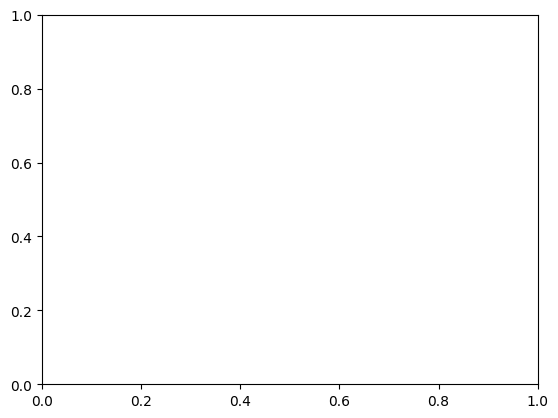

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# generate ids, based on the names of the trajs
ids = (trajs.name_arr == "asp7").astype(int)

ax.scatter(*emap.encode()[ids == 0].T, label="glu7")
ax.scatter(*emap.encode()[ids == 1].T, label="asp7")

ax.legend()

## Create a new trajectory

Using the `InteractivePlotting` class, we can easily generate new molecular conformations by using the decoder part of the neural network. If you're running an interactive notebook, you can use the notebook or qt5 backend and play around with the InteractivePlotting.

In [10]:
# %matplotlib qt5
%matplotlib inline
sess = em.InteractivePlotting(emap)

NameError: name 'em' is not defined

For static notebooks, we load the points along the path and generate new molecular conformations from them.

In [11]:
sess.statusmenu.status = "Bezier"
sess.ball_and_stick = True
sess.path_points = np.load("path.npy")
sess.tool.ind = np.load("path.npy")
sess.set_points()

NameError: name 'sess' is not defined

View the generated traj:

In [12]:
sess.view

NameError: name 'sess' is not defined